In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import h5py as h5
np.set_printoptions(precision=3, suppress=True)

In [2]:
from convert_to_hdf5 import SHOT, HDF5_FILE, h5_tree

In [3]:
# with h5.File(HDF5_FILE, 'r') as f: h5_tree(f)

In [4]:
# testing iteration over the file
def print_node(name, object):
    print(f'{name}: {object}')


# with h5.File(HDF5_FILE, 'r') as f:
#     f.visititems(print_node)

In [5]:
# function to get all the nodes of a specific usage
# USAGES: 'STRUCTURE': 8776, 'SUBTREE': 78, 'DEVICE': 642, 'ACTION': 1098, 'NUMERIC': 47760, 'TEXT': 17269, 'SIGNAL': 20904, 'ANY': 29, 'AXIS': 215
# only mhd 'STRUCTURE': 1201, 'SUBTREE': 6, 'DEVICE': 81, 'SIGNAL': 5491, 'NUMERIC': 8644, 'TEXT': 2669, 'ACTION': 151, 'ANY': 8
def get_nodes(hdf, target_usage):
    nodes = []
    def get_node(name, object):
        usage = object.attrs.get('usage')
        if usage is None: usage = ''
        if usage.upper() == target_usage.upper():
            nodes.append(name)
    hdf.visititems(get_node)
    return nodes

In [6]:
# get x numeric nodes and print their values
with h5.File(HDF5_FILE, 'r') as t:
    numeric_nodes = get_nodes(t, 'NUMERIC')
    numeric_nodes = np.random.choice(numeric_nodes, 20)
    for node in numeric_nodes: print(f'{node}: {t[node][()]}')

RFX/MHD/MHD_BR/CPCI_1/GAIN/GAIN5/CHANNEL_10/INT_GAIN: 4
RFX/MHD/MHD_BR/CPCI_1/GAIN/GAIN3/CHANNEL_10/LIN_CALIB: 1.0
RFX/MHD/MHD_AC/CPCI_2/TIMING/DIO2_1/CHANNEL_2/FREQUENCY_1: 1000
RFX/MHD/MHD_BC/CPCI_1/ADC/TR10_7/CHANNEL_03/START_TIME: -0.05000000074505806
RFX/MHD/MHD_AC/CPCI_2/ADC/TR10_5/CHANNEL_16/END_TIME: 1.0
RFX/MHD/MHD_BR/CPCI_1/GAIN/GAIN11/CHANNEL_14/ATTENUATION: 1.0
RFX/MHD/MHD_BC/CPCI_1/SIGNALS/REFERENCES/R394: [0.003 0.003 0.003 ... 0.    0.    0.   ]
RFX/MHD/MHD_BC/VME/CONTROL/PARAMETERS/PAR234_VAL: 0.0
RFX/MHD/MHD_BR/CPCI_1/ADC/TR10_7/CHANNEL_05/END_IDX: 27601
RFX/MHD/MHD_BR/CPCI_1/GAIN/GAIN1/CHANNEL_04/ATTENUATION: 1.0
RFX/MHD/MHD_AC/CPCI_1/ADC/TR10_4/CHANNEL_15/END_TIME: 1.0
RFX/MHD/MHD_BC/CPCI_2/ADC/TR10_8/CHANNEL_16/START_TIME: -0.05000000074505806
RFX/MHD/MHD_AC/CPCI_1/ADC/TR10_12/CHANNEL_11/START_IDX: -499
RFX/MHD/MHD_BC/VME/CONTROL/PARAMETERS/PAR304_VAL: 1
RFX/MHD/MHD_BR/CPCI_1/GAIN/GAIN6/CHANNEL_10/INT_GAIN: 4
RFX/MHD/MHD_BR/CPCI_1/GAIN/GAIN6/CHANNEL_02/INT_OUTPUT: [

RFX/MHD/MHD_BR/CPCI_1/ADC/TR10_9/CHANNEL_04/DATA: (27601,), float32
[-0.001 -0.001  0.    -0.001 -0.    -0.001 -0.    -0.002 -0.001 -0.001]


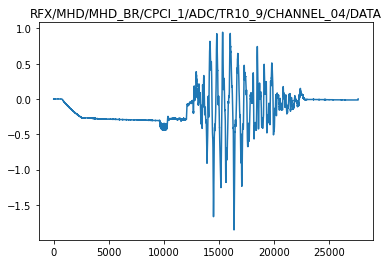

RFX/MHD/MHD_AC/VME/CURR_FF/I424: (88,), float32
[16.723 16.937 17.151 17.365 17.579 17.793 18.007 18.221 18.435 18.649]


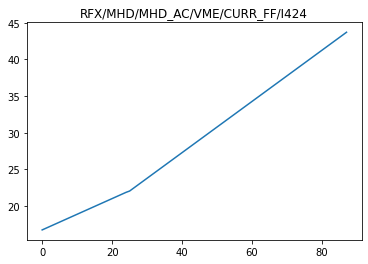

RFX/MHD/MHD_BR/VME/CONTROL_I/SIGNALS/ADC_IN_90: (3250,), float32
[ 0.01  -0.01   0.     0.029  0.01  -0.024  0.029  0.024 -0.02   0.01 ]


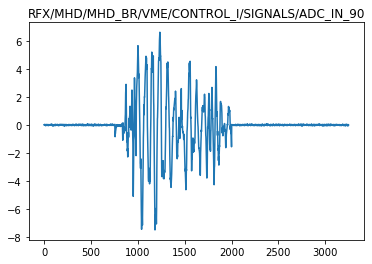

RFX/MHD/MHD_BR/VME/CONTROL_I/SIGNALS/MODE_PHS_73: (3250,), float32
[-3.077 -0.513 -0.61   2.642 -0.499 -3.075  2.859 -1.911 -0.66  -1.384]


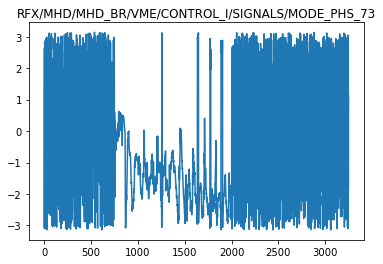

RFX/MHD/MHD_BC/VME/CONTROL/SIGNALS/USER_49: (2750,), float32
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


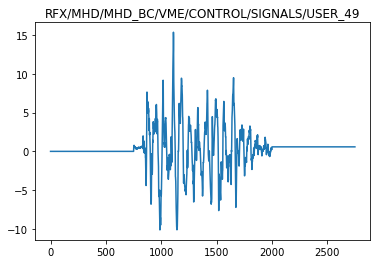

RFX/MHD/MHD_BC/VME/CONTROL/SIGNALS/MODE_MOD_74: (2750,), float32
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


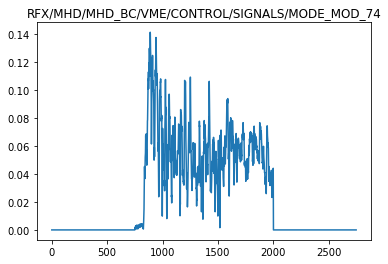

RFX/MHD/MHD_BR/VME/CONTROL/SIGNALS/MODE_PHS_37: (8750,), float32
[-0.081 -0.113 -0.121 -0.35  -0.213 -0.165 -0.261 -0.339 -0.04  -0.237]


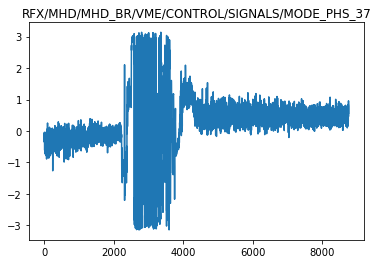

RFX/MHD/MHD_BC/VME/CURR_FF/I444: (88,), float32
[1.989 2.006 2.023 2.04  2.057 2.074 2.091 2.108 2.125 2.142]


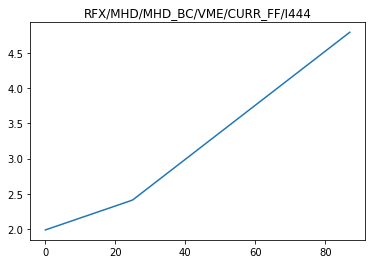

RFX/MHD/MHD_BC/VME/CONTROL/SIGNALS/ADC_IN_20: (2750,), float32
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


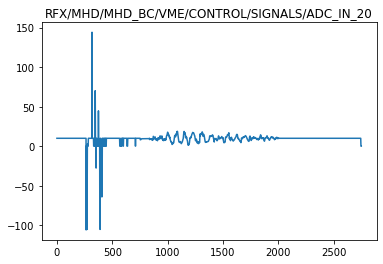

RFX/MHD/MHD_AC/VME/CURR_FF/I431: (88,), float32
[0.3   0.301 0.302 0.303 0.305 0.306 0.307 0.308 0.309 0.31 ]


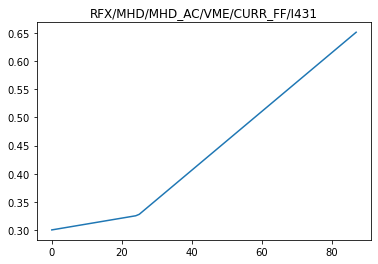

In [11]:
# plot 10 signals
N = 10
with h5.File(HDF5_FILE, 'r') as f:
    signals = get_nodes(f, 'SIGNAL')
    #select N random signals
    selected = np.random.choice(signals, N)
    for signal in selected:
        data = f[signal][:]
        print(f'{signal}: {data.shape}, {data.dtype}\n{data[:10]}')
        # plot the signal
        plt.plot(data)
        plt.title(signal)
        plt.show()